In [1]:
load("../data/dragons.RData")

In [3]:
head(dragons)

,testScore,bodyLength,mountainRange,site
,<dbl>,<dbl>,<fct>,<fct>
1,16.147309,165.5485,Bavarian,a
2,33.886183,167.5593,Bavarian,a
3,6.038333,165.8830,Bavarian,a
4,18.838821,167.6855,Bavarian,a
5,33.862328,169.9597,Bavarian,a
6,47.043246,168.6887,Bavarian,a


In [19]:
write.csv(dragons, "../data/dragons.csv")

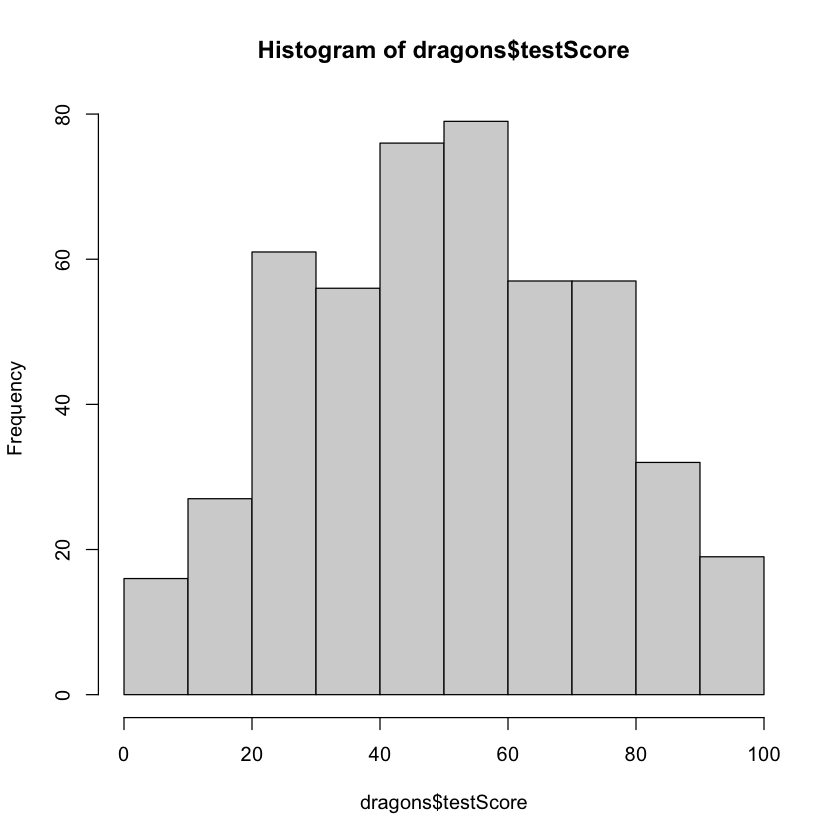

In [4]:
hist(dragons$testScore)  # seems close to a normal distribution - good!

In [5]:
dragons$bodyLength2 <- scale(dragons$bodyLength, center = TRUE, scale = TRUE)

In [6]:
basic.lm <- lm(testScore ~ bodyLength2, data = dragons)
summary(basic.lm)


Call:
lm(formula = testScore ~ bodyLength2, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.962 -16.411  -0.783  15.193  55.200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.3860     0.9676  52.072   <2e-16 ***
bodyLength2   8.9956     0.9686   9.287   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.2 on 478 degrees of freedom
Multiple R-squared:  0.1529,	Adjusted R-squared:  0.1511 
F-statistic: 86.25 on 1 and 478 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



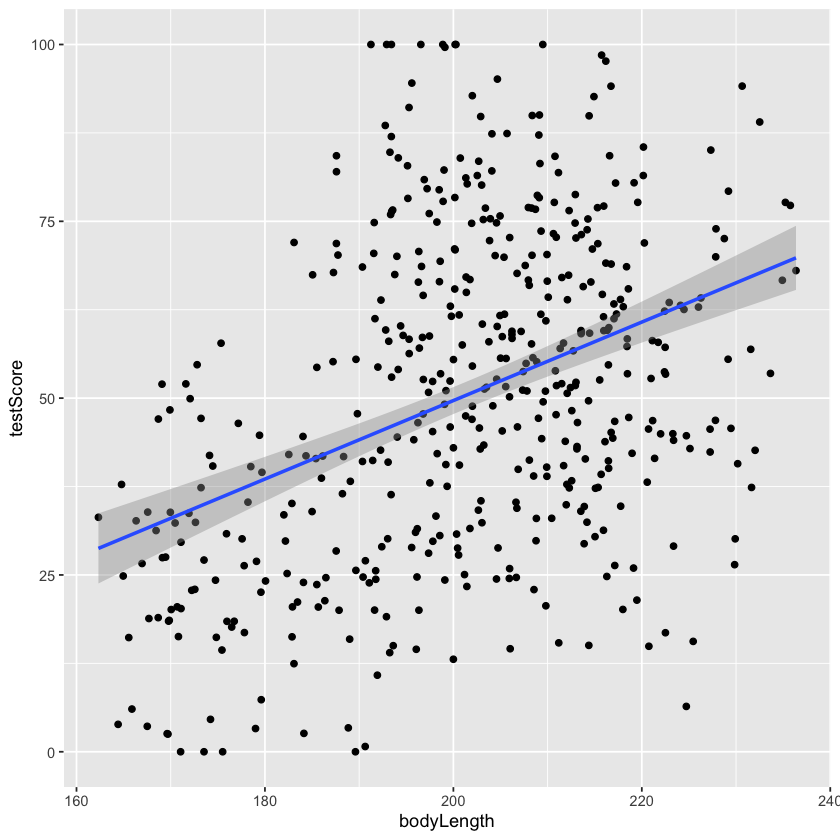

In [7]:
library(ggplot2)  # load the package

(prelim_plot <- ggplot(dragons, aes(x = bodyLength, y = testScore)) +
  geom_point() +
  geom_smooth(method = "lm"))
  

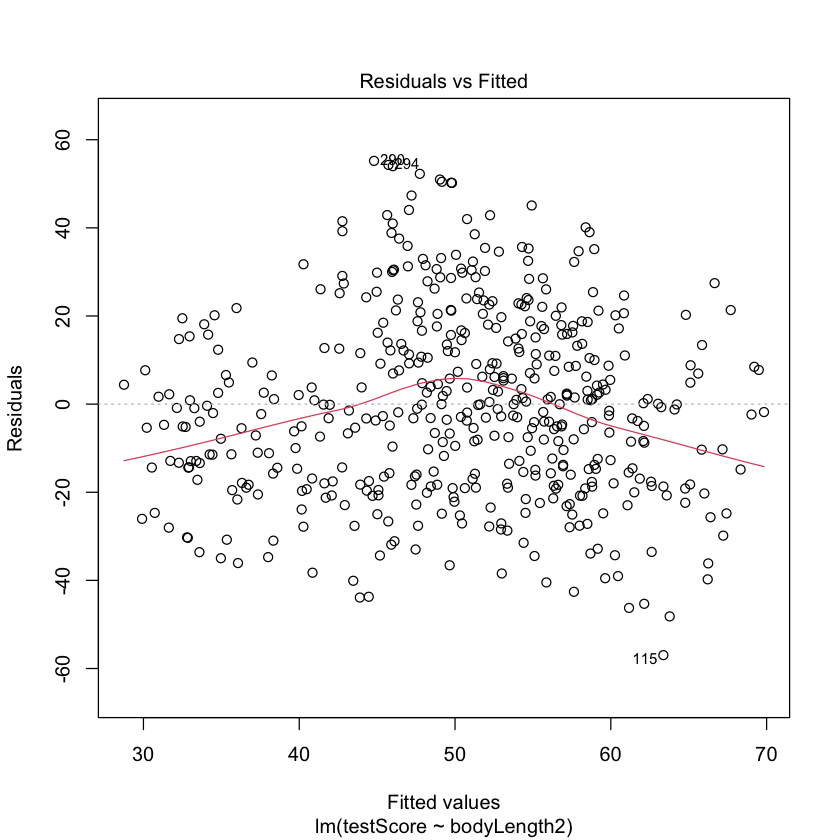

In [8]:
plot(basic.lm, which = 1)  # not perfect... 
## but since this is a fictional example we will go with it
## for your own data be careful:
## the bigger the sample size, the less of a trend you'd expect to see

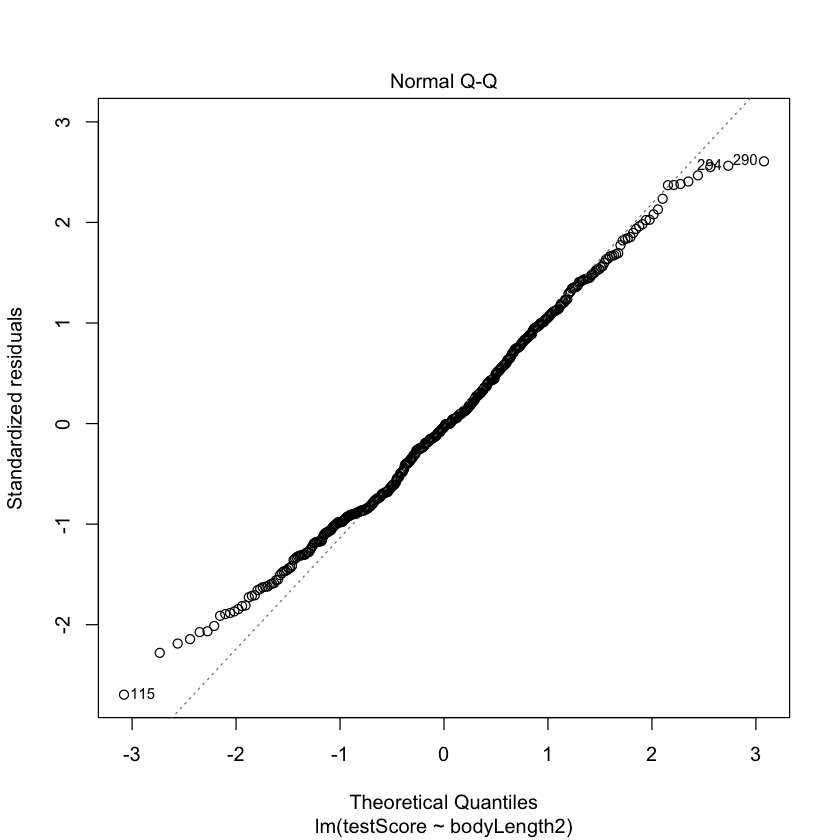

In [9]:
plot(basic.lm, which = 2)  # a bit off at the extremes, but that's often the case; again doesn't look too bad

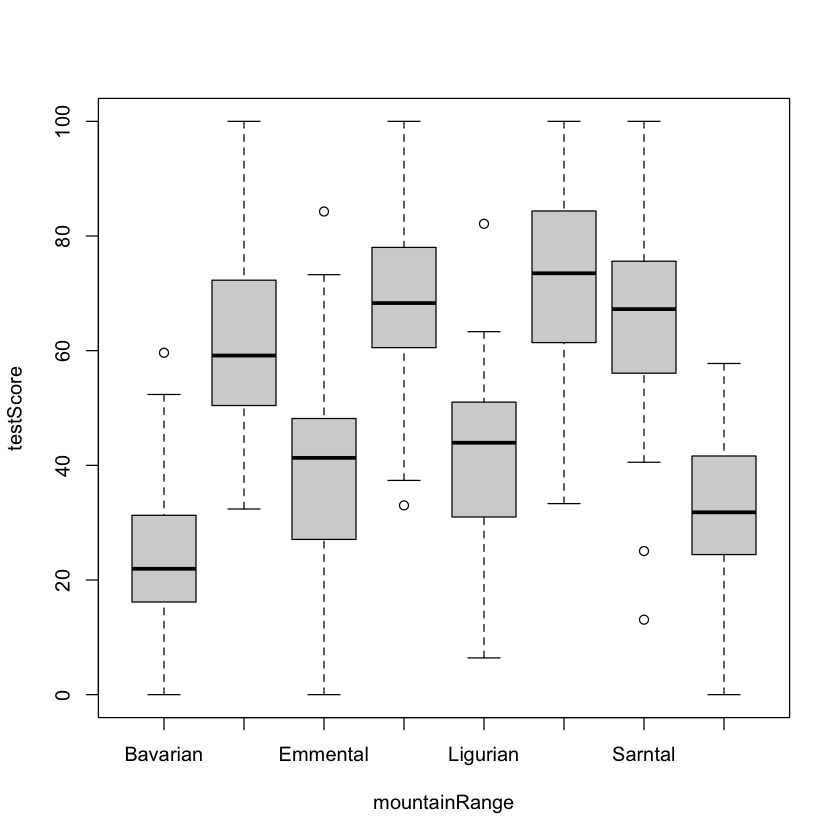

In [10]:
boxplot(testScore ~ mountainRange, data = dragons)  # certainly looks like something is going on here

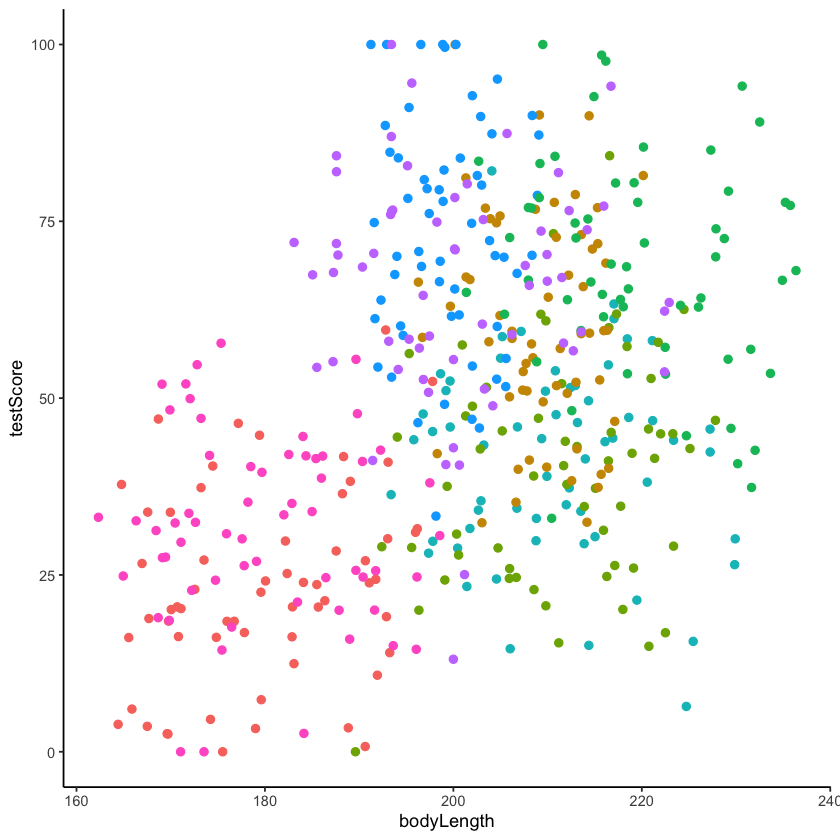

In [11]:
(colour_plot <- ggplot(dragons, aes(x = bodyLength, y = testScore, colour = mountainRange)) +
  geom_point(size = 2) +
  theme_classic() +
  theme(legend.position = "none"))

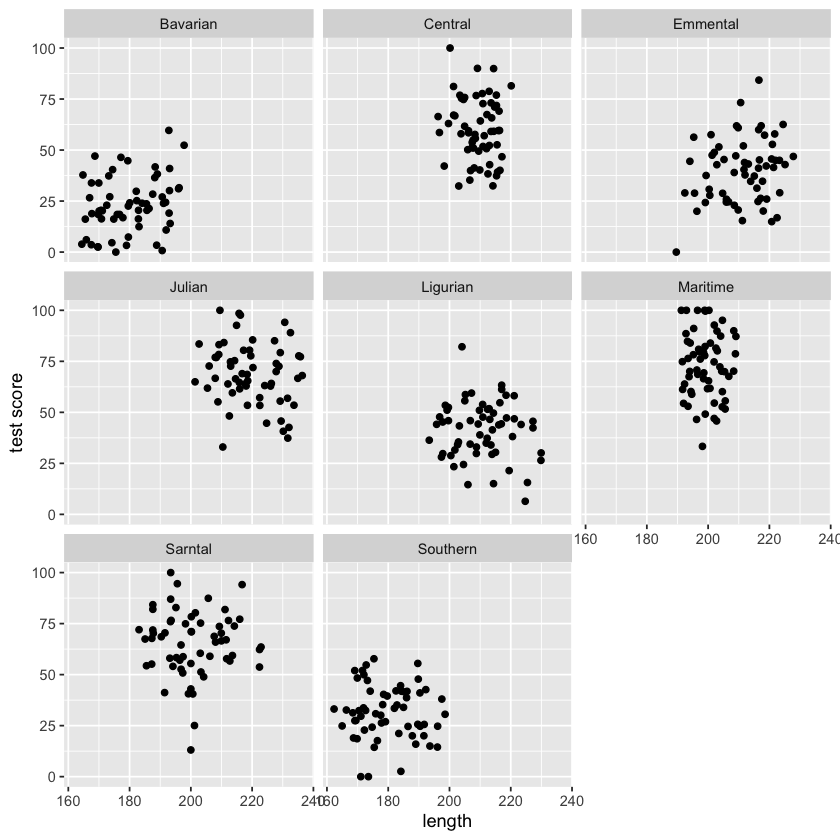

In [12]:
(split_plot <- ggplot(aes(bodyLength, testScore), data = dragons) + 
  geom_point() + 
  facet_wrap(~ mountainRange) + # create a facet for each mountain range
  xlab("length") + 
  ylab("test score"))

In [13]:
mountain.lm <- lm(testScore ~ bodyLength2 + mountainRange, data = dragons)
summary(mountain.lm)


Call:
lm(formula = testScore ~ bodyLength2 + mountainRange, data = dragons)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.263  -9.926   0.361   9.994  44.488 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.3818     2.5792   9.065  < 2e-16 ***
bodyLength2             0.2055     1.2927   0.159  0.87379    
mountainRangeCentral   36.5828     3.5993  10.164  < 2e-16 ***
mountainRangeEmmental  16.2092     3.6966   4.385 1.43e-05 ***
mountainRangeJulian    45.1147     4.1901  10.767  < 2e-16 ***
mountainRangeLigurian  17.7478     3.6736   4.831 1.84e-06 ***
mountainRangeMaritime  49.8813     3.1392  15.890  < 2e-16 ***
mountainRangeSarntal   41.9784     3.1972  13.130  < 2e-16 ***
mountainRangeSouthern   8.5196     2.7313   3.119  0.00192 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.96 on 471 degrees of freedom
Multiple R-squared:  0.5843,	Adjusted R-squared:  0.5773 
F

In [14]:
library(lme4)

载入需要的程辑包：Matrix



In [15]:
mixed.lmer <- lmer(testScore ~ bodyLength2 + (1|mountainRange), data = dragons)
summary(mixed.lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: testScore ~ bodyLength2 + (1 | mountainRange)
   Data: dragons

REML criterion at convergence: 3985.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4815 -0.6513  0.0066  0.6685  2.9583 

Random effects:
 Groups        Name        Variance Std.Dev.
 mountainRange (Intercept) 339.7    18.43   
 Residual                  223.8    14.96   
Number of obs: 480, groups:  mountainRange, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)  50.3860     6.5517   7.690
bodyLength2   0.5377     1.2750   0.422

Correlation of Fixed Effects:
            (Intr)
bodyLength2 0.000 

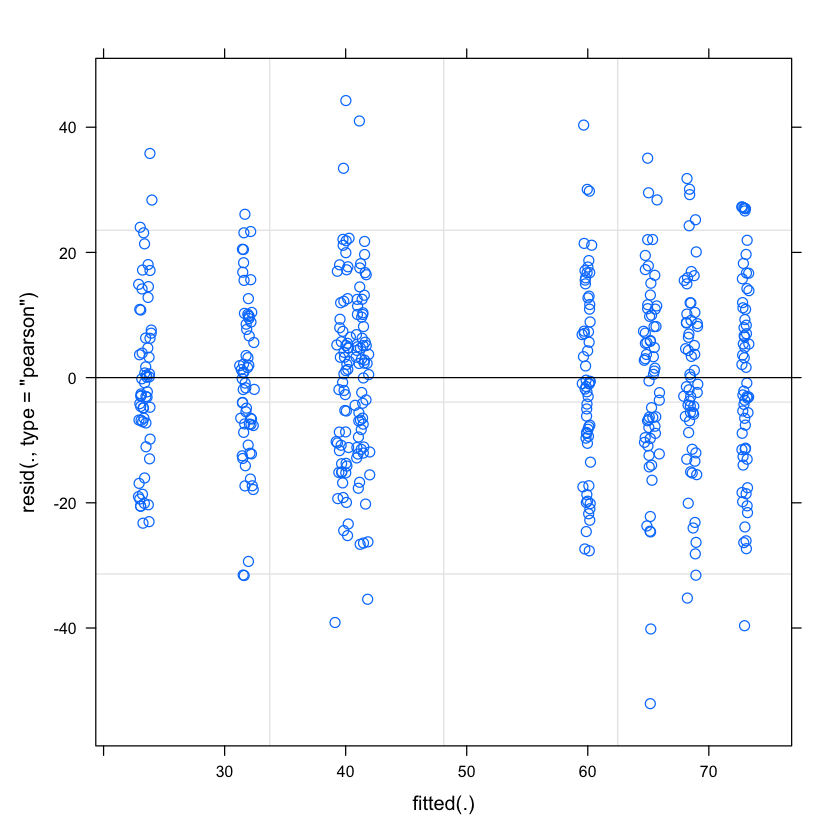

In [16]:
plot(mixed.lmer)  # looks alright, no patterns evident

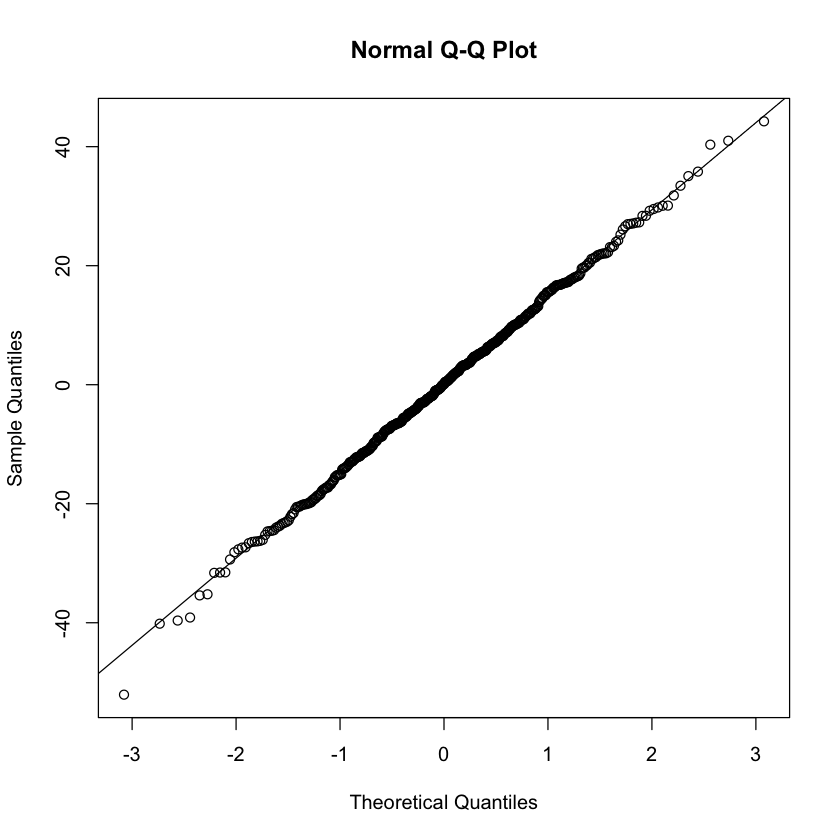

In [17]:
qqnorm(resid(mixed.lmer))
qqline(resid(mixed.lmer))  # points fall nicely onto the line - good!